[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [65]:
#Libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import datetime
 
from scipy.stats import pearsonr

In [66]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))


In [86]:
def cor_dist_dur(df_names):
    res_df=pd.DataFrame()
    for i,df_name in enumerate (df_names):
            # load the ith dataframe, taking only the t_pickup_datetime column
            df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'],
                             parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'])
            
            df['trip_duration']= ((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 's')).astype(int)
            

            res_df=res_df.append(df.loc[:,['trip_duration','trip_distance']])
    return res_df

In [87]:
df = cor_dist_dur(df_names)

In [89]:
df.shape

(53885062, 2)

# The dependence between distance and duration of the trip

In [96]:
df.shape

(52572818, 2)

In [94]:
# filtering durations 
df = df[(df['trip_duration'] > 120) & (df['trip_duration'] < 3600*2)]

In [95]:
df.shape

(52572818, 2)

In [97]:
# filtering distance
df= df[(df['trip_distance'] > 1 )&(df['trip_distance'] < 50)]

In [98]:
df.shape

(38568788, 2)

In [99]:
df.corr()

,trip_duration,trip_distance
trip_duration,1.000000,0.777664
trip_distance,0.777664,1.000000


In [100]:
df.head()

,trip_duration,trip_distance
1,1090,2.7
3,1949,10.2
4,1068,2.5
6,616,1.7
11,1479,3.5


In [105]:
df.rename(columns ={'trip_duration':'durations'}, inplace=True)

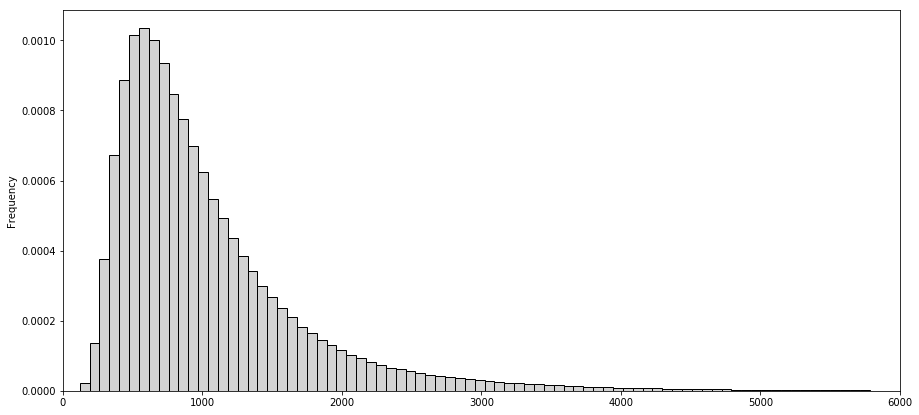

In [153]:
f = plt.figure()
df['durations'].plot(kind='hist',edgecolor="black", density=True, color='lightgrey',bins=100)
plt.xlim(0,6000)
f.set_figheight(7)
f.set_figwidth(15)

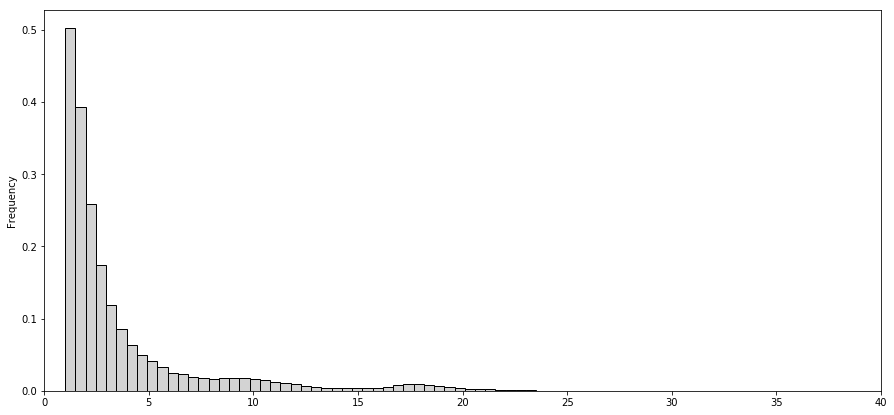

In [117]:
f = plt.figure()
df['trip_distance'].plot(kind='hist',edgecolor="black", density=True, color='lightgrey',bins=100)
plt.xlim(0,40)
f.set_figheight(7)
f.set_figwidth(15)

In [154]:
temp = df.sample(1000)

In [155]:
temp.head()

,durations,trip_distance
5902677,1211,3.36
4992339,1065,1.30
8861525,286,1.22
632888,1083,2.53
1262354,2127,15.60


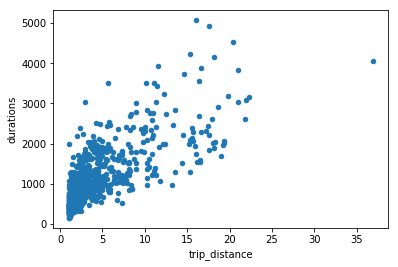

In [156]:
temp.plot(y='durations', x = 'trip_distance', kind = 'scatter')

In [144]:
temp.corr()

,durations,trip_distance
durations,1.000000,0.776902
trip_distance,0.776902,1.000000


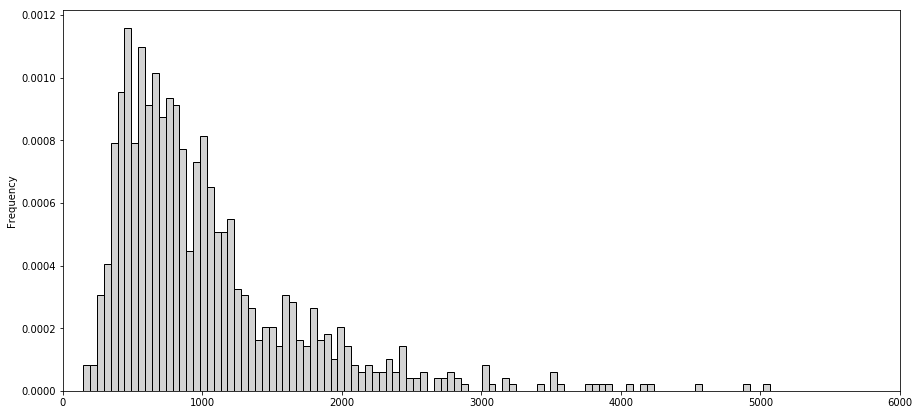

In [159]:
f = plt.figure()
temp['durations'].plot(kind='hist',edgecolor="black", density=True, color='lightgrey',bins=100)
plt.xlim(0,6000)
f.set_figheight(7)
f.set_figwidth(15)